In [1]:
!pip install lazypredict

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.semi_supervised import LabelSpreading
from sklearn.metrics import accuracy_score
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv('/content/original.csv')

In [7]:
df.head()

,Gender,Age,POLAR4 Quintile,POLAR3 Quintile,Adult HE 2001 Quintile,Adult HE 2011 Quintile,TUNDRA MSOA Quintile,TUNDRA LSOA Quintile,Gaps GCSE Quintile,Gaps GCSE Ethnicity Quintile,...,distance to university (km),Count of Module Area Logins,Total Hours in Module Area,% of Average Hours in Module Area,# of presence,# of Absence,Percent Attended,"label (fail=1, pass=0)",Unnamed: 20,Unnamed: 21
0,0.00,38.00,5.00,5.00,4.00,5.00,4.00,4.00,5.00,5.00,...,13.33,19.00,7.41,0.62,3.00,9.00,25.00,1.00,NaN,NaN
1,0.00,22.00,4.00,2.00,1.00,3.00,4.00,4.00,4.00,5.00,...,15.84,1.00,0.03,0.00,0.00,12.00,0.00,1.00,NaN,NaN
2,0.00,21.00,4.00,5.00,4.00,5.00,4.00,4.00,5.00,5.00,...,17.71,25.00,6.14,0.51,5.00,7.00,41.67,1.00,NaN,NaN
3,0.00,25.00,5.00,4.00,3.00,4.00,3.00,3.00,5.00,5.00,...,17.33,3.00,0.16,0.01,0.00,12.00,0.00,1.00,NaN,NaN
4,0.00,20.00,5.00,4.00,3.00,4.00,3.00,3.00,4.00,4.00,...,0.00,25.00,4.03,0.34,11.00,1.00,91.67,1.00,NaN,NaN


In [8]:
df.drop(columns =['Unnamed: 20', 'Unnamed: 21'], inplace = True)

In [9]:
df.head()

,Gender,Age,POLAR4 Quintile,POLAR3 Quintile,Adult HE 2001 Quintile,Adult HE 2011 Quintile,TUNDRA MSOA Quintile,TUNDRA LSOA Quintile,Gaps GCSE Quintile,Gaps GCSE Ethnicity Quintile,Uni Connect target ward,attending from home?,distance to university (km),Count of Module Area Logins,Total Hours in Module Area,% of Average Hours in Module Area,# of presence,# of Absence,Percent Attended,"label (fail=1, pass=0)"
0,0.00,38.00,5.00,5.00,4.00,5.00,4.00,4.00,5.00,5.00,0.00,1.00,13.33,19.00,7.41,0.62,3.00,9.00,25.00,1.00
1,0.00,22.00,4.00,2.00,1.00,3.00,4.00,4.00,4.00,5.00,0.00,1.00,15.84,1.00,0.03,0.00,0.00,12.00,0.00,1.00
2,0.00,21.00,4.00,5.00,4.00,5.00,4.00,4.00,5.00,5.00,0.00,1.00,17.71,25.00,6.14,0.51,5.00,7.00,41.67,1.00
3,0.00,25.00,5.00,4.00,3.00,4.00,3.00,3.00,5.00,5.00,0.00,0.00,17.33,3.00,0.16,0.01,0.00,12.00,0.00,1.00
4,0.00,20.00,5.00,4.00,3.00,4.00,3.00,3.00,4.00,4.00,0.00,1.00,0.00,25.00,4.03,0.34,11.00,1.00,91.67,1.00


In [10]:
df.isna().sum()

,0
Gender,7
Age,7
POLAR4 Quintile,7
POLAR3 Quintile,7
Adult HE 2001 Quintile,7
Adult HE 2011 Quintile,7
TUNDRA MSOA Quintile,7
TUNDRA LSOA Quintile,7
Gaps GCSE Quintile,7
Gaps GCSE Ethnicity Quintile,7


In [11]:
df = df.dropna()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 78 entries, 0 to 79
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             78 non-null     float64
 1   Age                                78 non-null     float64
 2   POLAR4 Quintile                    78 non-null     float64
 3   POLAR3 Quintile                    78 non-null     float64
 4   Adult HE 2001 Quintile             78 non-null     float64
 5   Adult HE 2011 Quintile             78 non-null     float64
 6   TUNDRA MSOA Quintile               78 non-null     float64
 7   TUNDRA LSOA Quintile               78 non-null     float64
 8   Gaps GCSE Quintile                 78 non-null     float64
 9   Gaps GCSE Ethnicity Quintile       78 non-null     float64
 10  Uni Connect target ward            78 non-null     float64
 11  attending from home?               78 non-null     float64
 12  d

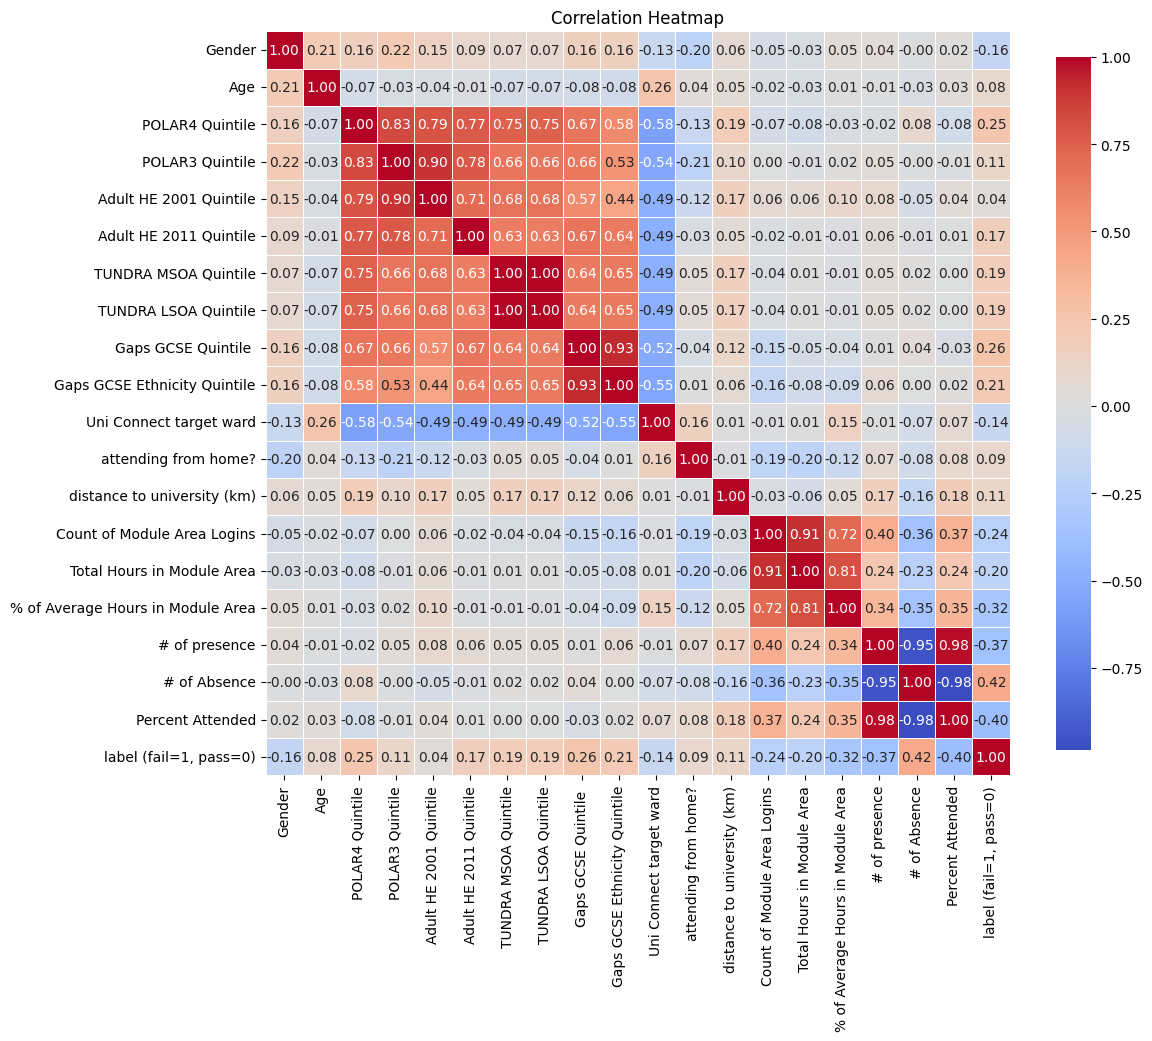

In [14]:
corr = df.corr()

plt.figure(figsize=(12, 12))


sns.heatmap(
    corr,
    annot=True,
    cmap='coolwarm',
    linewidths=.5,
    fmt=".2f",
    square=True,
    cbar_kws={"shrink": 0.75}
)


plt.title('Correlation Heatmap')

plt.show()

In [15]:
X = df.drop('label (fail=1, pass=0)', axis = 1)
y = df['label (fail=1, pass=0)']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
clf = LazyClassifier()

In [18]:
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

100%|██████████| 31/31 [00:01<00:00, 15.69it/s]

[LightGBM] [Info] Number of positive: 9, number of negative: 53
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001229 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 175
[LightGBM] [Info] Number of data points in the train set: 62, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.145161 -> initscore=-1.773067
[LightGBM] [Info] Start training from score -1.773067
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Li

In [19]:
print(models)

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LabelSpreading                     0.94               0.96     0.96      0.94   
LabelPropagation                   0.94               0.96     0.96      0.94   
GaussianNB                         0.69               0.81     0.81      0.72   
Perceptron                         0.88               0.79     0.79      0.88   
BernoulliNB                        0.81               0.76     0.76      0.82   
NearestCentroid                    0.75               0.72     0.72      0.77   
LinearSVC                          0.88               0.67     0.67      0.85   
KNeighborsClassifier               0.88               0.67     0.67      0.85   
BaggingClassifier                  0.88               0.67     0.67      0.85   
LGBMClassifier                     0.88               0.67     0.67      0.85   
ExtraTreesClassifier        

In [24]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.6875


In [25]:
from sklearn.semi_supervised import LabelPropagation

label_prop_model = LabelPropagation()

label_prop_model.fit(X_train, y_train)

y_pred_label_prop = label_prop_model.predict(X_test)

accuracy_label_prop = accuracy_score(y_test, y_pred_label_prop)
print("Accuracy (Label Propagation):", accuracy_label_prop)


Accuracy (Label Propagation): 0.8125


              precision    recall  f1-score   support

         0.0       0.90      0.69      0.78        13
         1.0       0.33      0.67      0.44         3

    accuracy                           0.69        16
   macro avg       0.62      0.68      0.61        16
weighted avg       0.79      0.69      0.72        16



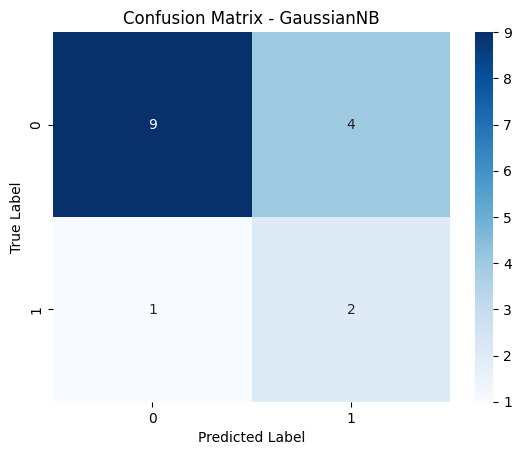

              precision    recall  f1-score   support

         0.0       0.81      1.00      0.90        13
         1.0       0.00      0.00      0.00         3

    accuracy                           0.81        16
   macro avg       0.41      0.50      0.45        16
weighted avg       0.66      0.81      0.73        16



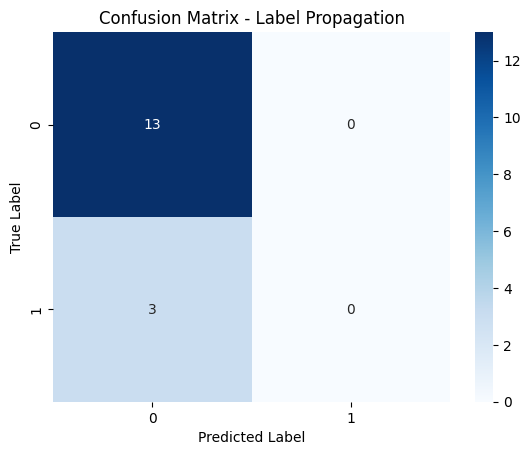

In [26]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred))

cm_gnb = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_gnb, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - GaussianNB')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print(classification_report(y_test, y_pred_label_prop))

cm_label_prop = confusion_matrix(y_test, y_pred_label_prop)
sns.heatmap(cm_label_prop, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Label Propagation')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

